# Evaluación 3

In [2]:
import os


import geopandas as gpd
from  fiona import listlayers

#maps
australiaMaps='https://github.com/SpatialDataScience23-2/evaluacion3/raw/main/maps/australiaMaps_3112.gpkg'

#layers in maps
listlayers(australiaMaps)

['country', 'cities', 'rivers']

In [3]:
australia=gpd.read_file(australiaMaps,layer='country')
australia_cities=gpd.read_file(australiaMaps,layer='cities')
australia_rivers=gpd.read_file(australiaMaps,layer='rivers')

In [4]:
australia.crs.to_epsg()==australia_cities.crs.to_epsg()==australia_rivers.crs.to_epsg()

True

<Axes: >

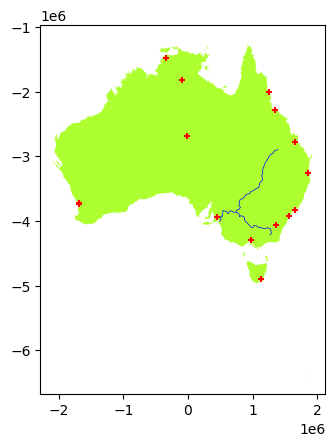

In [5]:
# plotting
base = australia.plot(facecolor="greenyellow")
australia_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
australia_cities.plot(marker='+', color='red', markersize=15,ax=base)

---------------------------

### Exercise 1

<div class="alert-success"> 
    
1. Check if your country is a polygon or multipolygon.
    
2. Recover just the boundaries of that country.
    
3. Turn the boundary into a GDF.
</div>

## Formating Geoseries projections

In [6]:
australia

COUNTRY                                           geometry
0  Australia  MULTIPOLYGON (((933348.661 -1235788.329, 92574...

In [7]:
australia.boundary

0    MULTILINESTRING ((933348.661 -1235788.329, 925...
dtype: geometry

<Axes: >

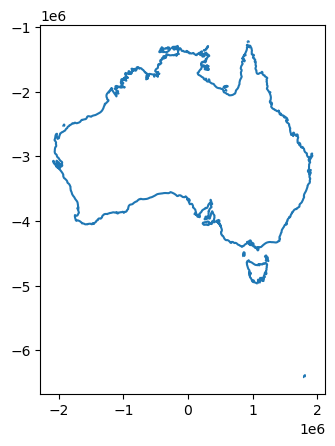

In [8]:
# This is just the borderline
australia.boundary.plot()

In [9]:
# does 'boundary' return a GDF?
type(australia.boundary)

geopandas.geoseries.GeoSeries

In [10]:
# converting into GDF
australia.boundary.to_frame()

0
0  MULTILINESTRING ((933348.661 -1235788.329, 925...

In [13]:
# conversion
australia_border=australia.boundary.to_frame() 

# new column (optional)
australia_border['name']='Australia' 

# renaming the geometry column
australia_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
australia_border = australia_border.set_geometry("geometry")

# verifying:
australia_border.crs

<Projected CRS: EPSG:3112>
Name: GDA94 / Geoscience Australia Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - Australian Capital Territory; New South Wales; Northern Territory; Queensland; South Australia; Tasmania; Western Australia; Victoria.
- bounds: (112.85, -43.7, 153.69, -9.86)
Coordinate Operation:
- name: Geoscience Australia Standard National Scale Lambert Projection
- method: Lambert Conic Conformal (2SP)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
australia_border

geometry       name
0  MULTILINESTRING ((933348.661 -1235788.329, 925...  Australia

-----------------------------

### Exercise 2

<div class="alert-success">

1. Look for sub administrative divisions of your country
2. Check all the CRSs of those divisions
3. If you find one CRS is missing, fill the CRS with the right projection.
</div>

## Lacking CRS information
Reprojecting seems a simple process, but you might find some interesting cases. Let's read the maps on _states_ and _municipalities_:

In [15]:
australia_states=gpd.read_file(os.path.join("maps","gadm41_AUS_shp","gadm41_AUS_1.shp"))
australia_municipalities=gpd.read_file(os.path.join("maps","gadm41_AUS_shp","gadm41_AUS_2.shp"))

In [17]:
#print(australia_municipalities.columns)

Index(['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry'],
      dtype='object')


In [18]:
australia_states.crs, australia_municipalities.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

**Note that we obtain and answer different to "(None, None)" which indicates that there is a specific CRS associated with the map data, and thus implies that the map is projected**

<Axes: >

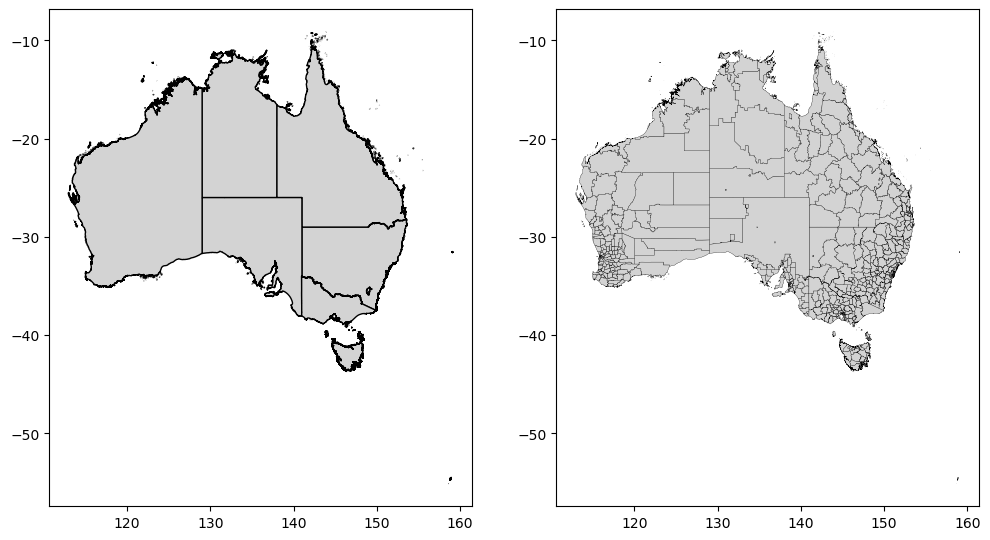

In [19]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))
australia_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
australia_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)


In [20]:
australia_states.to_crs(3112)

GID_1 GID_0    COUNTRY                        NAME_1 VARNAME_1  \
0    AUS.1_1   AUS  Australia   Ashmore and Cartier Islands        NA   
1    AUS.2_1   AUS  Australia  Australian Capital Territory        NA   
2    AUS.3_1   AUS  Australia   Coral Sea Islands Territory        NA   
3    AUS.4_1   AUS  Australia          Jervis Bay Territory        NA   
4    AUS.5_1   AUS  Australia               New South Wales        NA   
5    AUS.6_1   AUS  Australia            Northern Territory        NA   
6    AUS.7_1   AUS  Australia                    Queensland        NA   
7    AUS.8_1   AUS  Australia               South Australia        NA   
8    AUS.9_1   AUS  Australia                      Tasmania        NA   
9   AUS.10_1   AUS  Australia                      Victoria        NA   
10  AUS.11_1   AUS  Australia             Western Australia        NA   

   NL_NAME_1     TYPE_1  ENGTYPE_1 CC_1 HASC_1   ISO_1  \
0         NA  Territory  Territory   12  AU.AS      NA   
1         NA  Territory  Territory    8  AU.AC  AU-ACT   
2         NA  Territory  Territory   11  AU.CR      NA   
3         NA  Territory  Territory   10  AU.JB      NA   
4         NA      State      State    1  AU.NS  AU-NSW   
5         NA  Territory  Territory    7  AU.NT   AU-NT   
6         NA      State      State    3  AU.QL  AU-QLD   
7         NA      State      State    4  AU.SA   AU-SA   
8         NA      State      State    6  AU.TS  AU-TAS   
9         NA      State      State    2  AU.VI  AU-VIC   
10        NA      State      State    5  AU.WA   AU-WA   

                                             geometry  
0   MULTIPOLYGON (((-1155528.973 -1509855.849, -11...  
1   POLYGON ((1377837.616 -4045794.766, 1377835.52...  
2   MULTIPOLYGON (((2171096.644 -2836891.086, 2171...  
3   MULTIPOLYGON (((1512782.961 -4060699.652, 1512...  
4   MULTIPOLYGON (((1425477.420 -4282022.059, 1425...  
5   MULTIPOLYGON (((396919.115 -2912009.360, 39663...  
6   MULTIPOLYGON (((1888723.119 -3335704.807, 1888...  
7   MULTIPOLYGON (((588130.207 -4295631.676, 58812...  
8   MULTIPOLYGON (((1775447.870 -6460286.466, 1775...  
9   MULTIPOLYGON (((1072497.608 -4455108.029, 1072...  
10  MULTIPOLYGON (((-1097002.018 -3933989.539, -10...

In [21]:
australia_states.geometry.head()

0    MULTIPOLYGON (((123.55544 -12.53185, 123.55537...
1    POLYGON ((149.20070 -35.20541, 149.20070 -35.2...
2    MULTIPOLYGON (((155.53674 -23.25240, 155.53647...
3    MULTIPOLYGON (((150.69450 -35.18469, 150.69438...
4    MULTIPOLYGON (((150.05190 -37.26310, 150.05199...
Name: geometry, dtype: geometry

In [37]:
australia_states.crs = "EPSG:4326"
australia_municipalities.crs = "EPSG:4326"

In [38]:
australia_states=australia_states.to_crs(3112)
australia_municipalities=australia_municipalities.to_crs(3112)

---------------------------


### Exercise 3 
<div class="alert-success">

1. Look for some points in a CSV file about your country.
    
2. Turn those points into a spatial object.
    
3. Save the layer.
    
</div>

<a class="anchor" id="13"></a>

## Projecting Lat/Lon Points

You will get Lines and Polygons as maps for sure, but that may not be the case with points. These points came as a CSV file:

In [22]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","au-airports.csv"))

# see

infoairports

id        ident                 type  \
0     #meta +id  #meta +code  #loc +airport +type   
1         27145         YSSY        large_airport   
2         27066         YMML        large_airport   
3         26901         YBBN        large_airport   
4         26904         YBCS       medium_airport   
...         ...          ...                  ...   
2576     429884         YXYA             heliport   
2577     429887         YRYP             heliport   
2578     350551      AU-0250             heliport   
2579     352695         YXYK             heliport   
2580     309325         YXYO             heliport   

                                              name         latitude_deg  \
0                              #loc +airport +name            #geo +lat   
1     Sydney Kingsford Smith International Airport   -33.94609832763672   
2                  Melbourne International Airport           -37.673302   
3                   Brisbane International Airport  -27.384199142456055   
4                     Cairns International Airport        -16.885799408   
...                                            ...                  ...   
2576         Yass Hospital Helicopter Landing Site           -34.854608   
2577                         Rayner Place Heliport           -34.862795   
2578           Yeoval Oval Helicopter Landing Site           -32.750616   
2579    Yorketown Hospital Helicopter Landing Site           -35.018889   
2580                        Young Hospital Helipad            -34.32094   

           longitude_deg         elevation_ft                 continent  \
0              #geo +lon  #geo +elevation +ft  #region +continent +code   
1       151.177001953125                   21                        OC   
2             144.843002                  434                        OC   
3     153.11700439453125                   13                        OC   
4          145.755004883                   10                        OC   
...                  ...                  ...                       ...   
2576          148.908316                 1747                        OC   
2577          148.933818                 1690                        OC   
2578          148.646634                 1248                        OC   
2579          137.611667                   89                        OC   
2580           148.28798                 1523                        OC   

        country_name           iso_country  ...              municipality  \
0     #country +name  #country +code +iso2  ...  #loc +municipality +name   
1          Australia                    AU  ...                    Sydney   
2          Australia                    AU  ...                 Melbourne   
3          Australia                    AU  ...                  Brisbane   
4          Australia                    AU  ...                    Cairns   
...              ...                   ...  ...                       ...   
2576       Australia                    AU  ...                      Yass   
2577       Australia                    AU  ...                      Yass   
2578       Australia                    AU  ...                    Yeoval   
2579       Australia                    AU  ...                 Yorketown   
2580       Australia                    AU  ...                     Young   

       scheduled_service                  gps_code                  iata_code  \
0     #status +scheduled  #loc +airport +code +gps  #loc +airport +code +iata   
1                      1                      YSSY                        SYD   
2                      1                      YMML                        MEL   
3                      1                      YBBN                        BNE   
4                      1                      YBCS                        CNS   
...                  ...                       ...                        ...   
2576                   0                      YXYA                        NaN   
2

In [23]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)

# keep the  columns needed
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2580 non-null   object
 1   type           2580 non-null   object
 2   latitude_deg   2580 non-null   object
 3   longitude_deg  2580 non-null   object
 4   elevation_ft   1365 non-null   object
 5   region_name    2580 non-null   object
 6   municipality   1385 non-null   object
dtypes: object(7)
memory usage: 141.2+ KB


In [24]:
# formatting is needed: 
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2580 non-null   object 
 1   type           2580 non-null   object 
 2   latitude_deg   2580 non-null   float64
 3   longitude_deg  2580 non-null   float64
 4   elevation_ft   1365 non-null   float64
 5   region_name    2580 non-null   object 
 6   municipality   1385 non-null   object 
dtypes: float64(3), object(4)
memory usage: 141.2+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

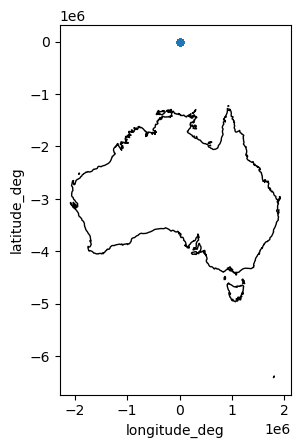

In [25]:
# let's plot

base = australia.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

1. Create a GeoDataFrame with the points, keeping them unprojected:

In [26]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=4326)# the coordinates were in degrees - unprojected

2. Reproject the GeoDataFrame:

In [27]:
airports=airports.to_crs(3112)

<Axes: >

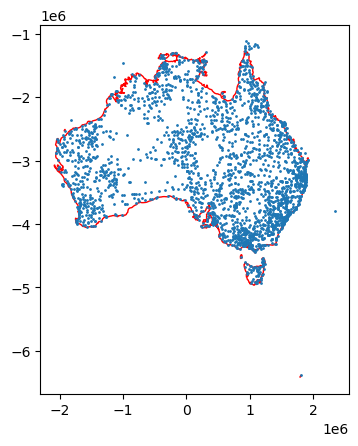

In [28]:
# let's plot

base = australia.plot(color='white', edgecolor='red')
airports.plot(ax=base,markersize=1)

In [29]:
# Now we have spatial points
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

In [30]:
# There are two types of airports: 
airports['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     1957
heliport           365
medium_airport     185
closed              63
large_airport        6
seaplane_base        4
Name: count, dtype: int64

In [31]:
airports.rename(columns={'type':'kind'},inplace=True)

In [32]:
from folium import LayerControl


m = airports[airports.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airports[airports.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports[airports.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)
m = airports[airports.kind=='seaplane_base'].explore(m=m, color="green",name="seaplane",show=False)
m = airports[airports.kind=='closed'].explore(m=m, color="white",name="closed",show=False)
m = airports[airports.kind=='heliport'].explore(m=m, color="orange",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m) #optional

m

--------------------------

### Exercise 4


<div class="alert-success"> 

1. Compute the centroid of your country.

2. Combine all the polygons to the north, and also all the polygons to the south; use unary union.

3. Detect the amount of duplicates after the combination.

4. Plot both maps so that duplicates appear.
    
</div>

In [39]:
centroAustralia=australia.centroid
centroAustralia

0    POINT (32199.226 -2924192.688)
dtype: geometry

In [40]:
type(centroAustralia), type(centroAustralia.x)

(geopandas.geoseries.GeoSeries, pandas.core.series.Series)

In [41]:
type(centroAustralia.x[0]),type(centroAustralia.y[0])

(numpy.float64, numpy.float64)

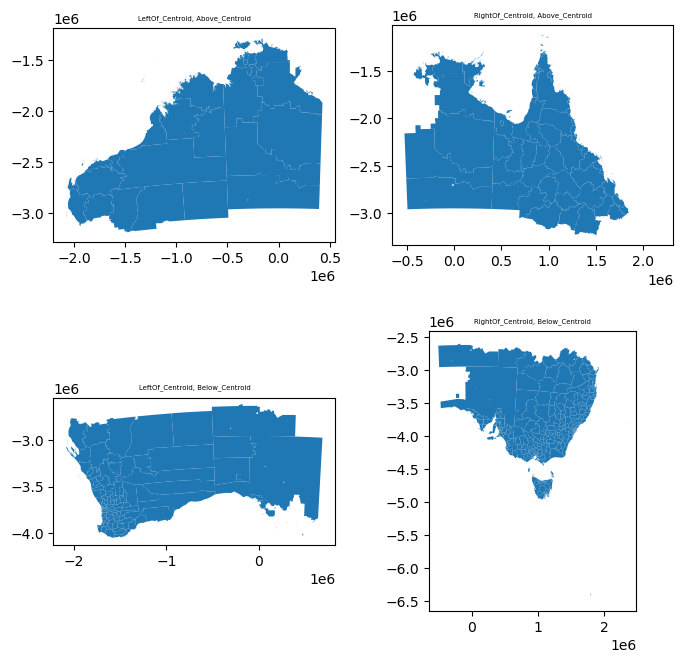

In [42]:
fig, axs = plt.subplots(nrows=2,ncols=2,sharex=False, sharey=False,figsize=(8,8))

centroidX=centroAustralia.x[0]
centroidY=centroAustralia.y[0]

axs[0,0].set_title('LeftOf_Centroid, Above_Centroid',fontsize=5)
australia_municipalities.cx[:centroidX,centroidY:].plot(ax=axs[0,0]) 

axs[0,1].set_title('RightOf_Centroid, Above_Centroid',fontsize=5)
australia_municipalities.cx[centroidX:,centroidY:].plot(ax=axs[0,1]) 

axs[1,0].set_title('LeftOf_Centroid, Below_Centroid',fontsize=5)
australia_municipalities.cx[:centroidX,:centroidY].plot(ax=axs[1,0]) 

axs[1,1].set_title('RightOf_Centroid, Below_Centroid',fontsize=5)
australia_municipalities.cx[centroidX:,:centroidY].plot(ax=axs[1,1]) ;

In [43]:
#instead of:
australia_municipalities.cx[:centroidX,centroidY:]

GID_2 GID_0    COUNTRY     GID_1                       NAME_1  \
0       AUS.1.1_1   AUS  Australia   AUS.1_1  Ashmore and Cartier Islands   
157     AUS.6.1_1   AUS  Australia   AUS.6_1           Northern Territory   
158     AUS.6.2_1   AUS  Australia   AUS.6_1           Northern Territory   
159     AUS.6.3_1   AUS  Australia   AUS.6_1           Northern Territory   
160     AUS.6.4_1   AUS  Australia   AUS.6_1           Northern Territory   
161     AUS.6.5_1   AUS  Australia   AUS.6_1           Northern Territory   
162     AUS.6.6_1   AUS  Australia   AUS.6_1           Northern Territory   
164     AUS.6.8_1   AUS  Australia   AUS.6_1           Northern Territory   
165     AUS.6.9_1   AUS  Australia   AUS.6_1           Northern Territory   
166    AUS.6.10_1   AUS  Australia   AUS.6_1           Northern Territory   
167    AUS.6.11_1   AUS  Australia   AUS.6_1           Northern Territory   
168    AUS.6.12_1   AUS  Australia   AUS.6_1           Northern Territory   
169    AUS.6.13_1   AUS  Australia   AUS.6_1           Northern Territory   
170    AUS.6.14_1   AUS  Australia   AUS.6_1           Northern Territory   
171    AUS.6.15_1   AUS  Australia   AUS.6_1           Northern Territory   
172    AUS.6.16_1   AUS  Australia   AUS.6_1           Northern Territory   
173    AUS.6.17_1   AUS  Australia   AUS.6_1           Northern Territory   
430    AUS.11.3_1   AUS  Australia  AUS.11_1            Western Australia   
440   AUS.11.13_1   AUS  Australia  AUS.11_1            Western Australia   
449   AUS.11.22_1   AUS  Australia  AUS.11_1            Western Australia   
467   AUS.11.40_1   AUS  Australia  AUS.11_1            Western Australia   
473   AUS.11.46_1   AUS  Australia  AUS.11_1            Western Australia   
475   AUS.11.48_1   AUS  Australia  AUS.11_1            Western Australia   
482   AUS.11.55_1   AUS  Australia  AUS.11_1            Western Australia   
502   AUS.11.75_1   AUS  Australia  AUS.11_1            Western Australia   
522   AUS.11.95_1   AUS  Australia  AUS.11_1            Western Australia   
531  AUS.11.104_1   AUS  Australia  AUS.11_1            Western Australia   
535  AUS.11.108_1   AUS  Australia  AUS.11_1            Western Australia   
537  AUS.11.110_1   AUS  Australia  AUS.11_1            Western Australia   
548  AUS.11.121_1   AUS  Australia  AUS.11_1            Western Australia   
560  AUS.11.133_1   AUS  Australia  AUS.11_1            Western Australia   
564  AUS.11.137_1   AUS  Australia  AUS.11_1            Western Australia   

    NL_NAME_1                            NAME_2 VARNAME_2 NL_NAME_2  \
0          NA       Ashmore and Cartier Islands        NA        NA   
157        NA                     Alice Springs        NA        NA   
158        NA                            Barkly        NA        NA   
159        NA                           Belyuen        NA        NA   
160        NA                    Central Desert        NA        NA   
161        NA                          Coomalie        NA        NA   
162        NA                            Darwin        NA        NA   
164        NA                         Katherine        NA        NA   
165        NA                        Litchfield        NA        NA   
166        NA                        MacDonnell        NA        NA   
167        NA                        Palmerston        NA        NA   
168        NA                        Roper Gulf        NA        NA   
169        NA                      Tiwi Islands        NA        NA   
170        NA  Unincorporated Norther Territori        NA        NA   
171        NA                     Victoria-Daly        NA        NA   
172        NA                            Wagait        NA        NA   
173        NA                       West Arnhem        NA        NA   
430        NA                         Ashburton        NA        NA   
440        NA                            Broome        NA        NA   
449        NA                         Carnarvon   

In [44]:
# dissolving
australia_municipalities.cx[:centroidX,centroidY:].dissolve()

geometry      GID_2 GID_0  \
0  MULTIPOLYGON (((-1968223.173 -3073826.736, -19...  AUS.1.1_1   AUS   

     COUNTRY    GID_1                       NAME_1 NL_NAME_1  \
0  Australia  AUS.1_1  Ashmore and Cartier Islands        NA   

                        NAME_2 VARNAME_2 NL_NAME_2     TYPE_2  ENGTYPE_2 CC_2  \
0  Ashmore and Cartier Islands        NA        NA  Territory  Territory   NA   

  HASC_2  
0     NA

In [45]:
type(australia_municipalities.cx[:centroidX,centroidY:].dissolve())

geopandas.geodataframe.GeoDataFrame

<Axes: >

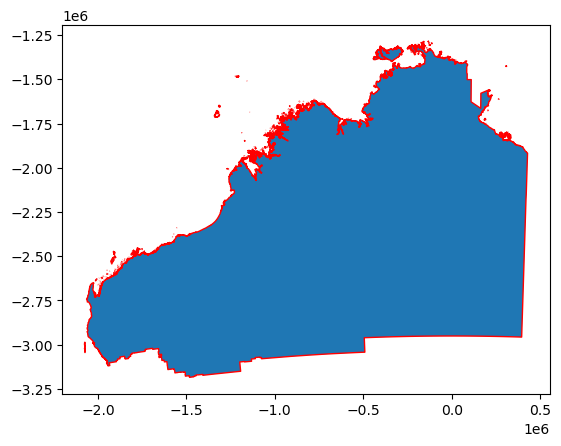

In [46]:
# as a GeoDF we can plot: 
australia_municipalities.cx[:centroidX,centroidY:].dissolve().plot(edgecolor='red')

<Axes: >

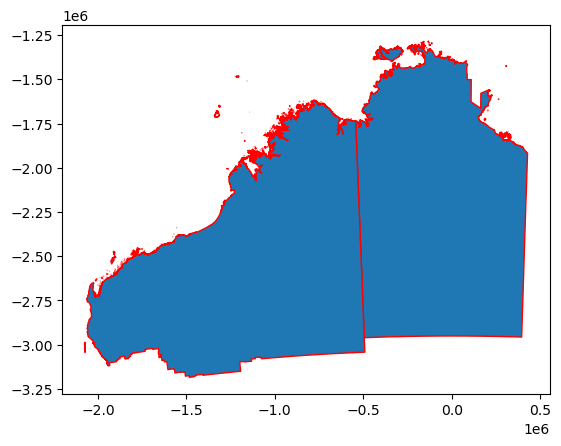

In [47]:
# the municipalities by state
australia_municipalities.cx[:centroidX,centroidY:].dissolve(by='NAME_1').plot(edgecolor='red')

### Unary Union
This operation is used to combine all the geometries in one GeoDF:

In [48]:
australia_municipalities.cx[:centroidX,centroidY:].unary_union

It looks like dissolve default behaviour, but:

In [49]:
type(australia_municipalities.cx[:centroidX,centroidY:].unary_union)

shapely.geometry.multipolygon.MultiPolygon

The result is not a GeoDF. It is a _shapely_ geometry. You could turn that into a GeoSeries:

In [50]:
gpd.GeoDataFrame(index=[0],
                 crs=australia_municipalities.crs,
                 geometry=[australia_municipalities.cx[:centroidX,centroidY:].unary_union])

geometry
0  MULTIPOLYGON (((-1968223.173 -3073826.736, -19...

Notice that _unary union_ erase all other columns; it only produces the geometry combined. 

Let me use the dissolve this time:

In [51]:
# you create
Australia_topleft=australia_municipalities.cx[:centroidX,centroidY:].dissolve()
# you get
Australia_topleft

geometry      GID_2 GID_0  \
0  MULTIPOLYGON (((-1968223.173 -3073826.736, -19...  AUS.1.1_1   AUS   

     COUNTRY    GID_1                       NAME_1 NL_NAME_1  \
0  Australia  AUS.1_1  Ashmore and Cartier Islands        NA   

                        NAME_2 VARNAME_2 NL_NAME_2     TYPE_2  ENGTYPE_2 CC_2  \
0  Ashmore and Cartier Islands        NA        NA  Territory  Territory   NA   

  HASC_2  
0     NA

Aside from the *COUNTRY* and  *geometry* column, the rest is meaningless, then:

In [56]:
Australia_topleft['zone']='NW' # add column
Australia_topleft=Australia_topleft.loc[:,['COUNTRY','zone','geometry']]   # keep some

# result
Australia_topleft

COUNTRY zone                                           geometry
0  Australia   NW  MULTIPOLYGON (((-1968223.173 -3073826.736, -19...

In [58]:
Australia_topRight=australia_municipalities.cx[centroidX:,centroidY:].dissolve()
Australia_bottomLeft=australia_municipalities.cx[:centroidX,:centroidY].dissolve()
Australia_bottomRight=australia_municipalities.cx[centroidX:,:centroidY].dissolve()

Australia_topRight['zone']='NE'
Australia_topRight=Australia_topRight.loc[:,['COUNTRY','zone','geometry']] 

Australia_bottomLeft['zone']='NE'
Australia_bottomLeft=Australia_bottomLeft.loc[:,['COUNTRY','zone','geometry']] 

Australia_bottomRight['zone']='NE'
Australia_bottomRight=Australia_bottomRight.loc[:,['COUNTRY','zone','geometry']] 


Keep in mind that with **CX** we may not get a perfect partition:

In [59]:
australia_municipalities

GID_2 GID_0    COUNTRY     GID_1                        NAME_1  \
0       AUS.1.1_1   AUS  Australia   AUS.1_1   Ashmore and Cartier Islands   
1       AUS.2.1_1   AUS  Australia   AUS.2_1  Australian Capital Territory   
2       AUS.3.1_1   AUS  Australia   AUS.3_1   Coral Sea Islands Territory   
3       AUS.4.1_1   AUS  Australia   AUS.4_1          Jervis Bay Territory   
4       AUS.5.1_1   AUS  Australia   AUS.5_1               New South Wales   
..            ...   ...        ...       ...                           ...   
563  AUS.11.136_1   AUS  Australia  AUS.11_1             Western Australia   
564  AUS.11.137_1   AUS  Australia  AUS.11_1             Western Australia   
565  AUS.11.138_1   AUS  Australia  AUS.11_1             Western Australia   
566  AUS.11.139_1   AUS  Australia  AUS.11_1             Western Australia   
567  AUS.11.140_1   AUS  Australia  AUS.11_1             Western Australia   

    NL_NAME_1                            NAME_2 VARNAME_2 NL_NAME_2  \
0          NA       Ashmore and Cartier Islands        NA        NA   
1          NA  Unincorporated Australian Capita        NA        NA   
2          NA                 Coral Sea Islands        NA        NA   
3          NA                        Jervis Bay        NA        NA   
4          NA                            Albury        NA        NA   
..        ...                               ...       ...       ...   
563        NA                       Wyalkatchem        NA        NA   
564        NA            Wyndham-East Kimberley        NA        NA   
565        NA                            Yalgoo        NA        NA   
566        NA                           Yilgarn        NA        NA   
567        NA                              York        NA        NA   

                  TYPE_2            ENGTYPE_2   CC_2    HASC_2  \
0              Territory            Territory     NA        NA   
1    Unincorporated Area  Unincorporated Area  89399        NA   
2              Territory            Territory     NA        NA   
3              Territory            Territory  99399        NA   
4                   City                 City  10050  AU.NS.AL   
..                   ...                  ...    ...       ...   
563                Shire                Shire  59330  AU.WA.WY   
564                Shire                Shire  59340  AU.WA.WE   
565                Shire                Shire  59350  AU.WA.YA   
566                Shire                Shire  59360  AU.WA.YI   
567                Shire                Shire  59370  AU.WA.YO   

                                              geometry  
0    MULTIPOLYGON (((-1155528.973 -1509855.849, -11...  
1    POLYGON ((1377837.616 -4045794.766, 1377835.52...  
2    MULTIPOLYGON (((2171096.644 -2836891.086, 2171...  
3    MULTIPOLYGON (((1512782.961 -4060699.652, 1512...  
4    POLYGON ((1152924.677 -4116752.803, 1152946.80...  
..                                                 ...  
563  POLYGON ((-1560889.257 -3650016.384, -1561690....  
564  MULTIPOLYGON (((-540761.314 -1795627.499, -540...  
565  POLYGON ((-1632853.297 -3198738.049, -1632437....  
566  POLYGON ((-1329900.147 -3481057.815, -1328747....  
567  POLYGON ((-1652261.056 -3737937.541, -1652731....  

[568 rows x 14 columns]

In [60]:
# let's calculate the difference: 
# tuple with count of rows
rowsCX=(australia_municipalities.cx[:centroAustralia.x[0],centroAustralia.y[0]:].shape[0],\
        australia_municipalities.cx[centroAustralia.x[0]:,centroAustralia.y[0]:].shape[0],\
        australia_municipalities.cx[:centroAustralia.x[0],:centroAustralia.y[0]].shape[0],\
        australia_municipalities.cx[centroAustralia.x[0]:,:centroAustralia.y[0]].shape[0])

sum(rowsCX)

596

In [61]:
# coincidences:
len(set(australia_municipalities.cx[:centroAustralia.x[0],centroAustralia.y[0]:].CC_2). \
intersection(set(australia_municipalities.cx[centroAustralia.x[0]:,centroAustralia.y[0]:].CC_2)). \
intersection(set(australia_municipalities.cx[:centroAustralia.x[0],:centroAustralia.y[0]].CC_2)). \
intersection(set(australia_municipalities.cx[centroAustralia.x[0]:,:centroAustralia.y[0]].CC_2)))

1

Adding up all the rows, we have more municipalities:

In [62]:
australia_municipalities.shape[0]

568

<Axes: >

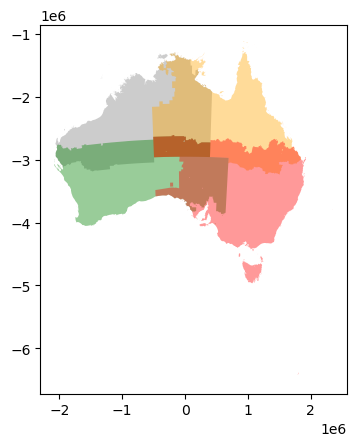

In [63]:
base=Australia_topleft.plot(facecolor='grey', alpha=0.4)
Australia_topRight.plot(ax=base,facecolor='orange', alpha=0.4)
Australia_bottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
Australia_bottomRight.plot(ax=base,facecolor='red', alpha=0.4)

---------------------------------------

### Exercise 5 

<div class="alert-success">

1. Select some points from your maps.
    
2. Create the convex hull for those points.
    
3. Turn the hull into a GDF.
    
4. Plot the hull on top of the country.
    
</div>